In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Transfer Learning Inception V3 using Keras

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cotton_plant_disease/Dataset/train'
valid_path = '/content/drive/MyDrive/cotton_plant_disease/Dataset/test'

In [5]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cotton_plant_disease/Dataset/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton_plant_disease/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton_plant_disease/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-e11f1bde8e18>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
61/61 [==============================] - 44s 715ms/step - loss: 0.4246 - accuracy: 0.9595 - val_loss: 0.5965 - val_accuracy: 0.9623
Epoch 2/30
61/61 [==============================] - 42s 695ms/step - loss: 0.3313 - accuracy: 0.9595 - val_loss: 0.1727 - val_accuracy: 0.9623
Epoch 3/30
61/61 [==============================] - 41s 674ms/step - loss: 0.2626 - accuracy: 0.9744 - val_loss: 0.9102 - val_accuracy: 0.9340
Epoch 4/30
61/61 [==============================] - 41s 671ms/step - loss: 0.4130 - accuracy: 0.9595 - val_loss: 0.4647 - val_accuracy: 0.9623
Epoch 5/30
61/61 [==============================] - 41s 676ms/step - loss: 0.5563 - accuracy: 0.9493 - val_loss: 0.4512 - val_accuracy: 0.9717
Epoch 6/30
61/61 [==============================] - 42s 695ms/step - loss: 0.6327 - accuracy: 0.9534 - val_loss: 0.6655 - val_accuracy: 0.9434
Epoch 7/30
61/61 [==============================] - 41s 677ms/step - loss: 0.4270 - accuracy: 0.9621 - val_loss: 0.1129 - val_accuracy: 0.9811

In [20]:
import matplotlib.pyplot as plt

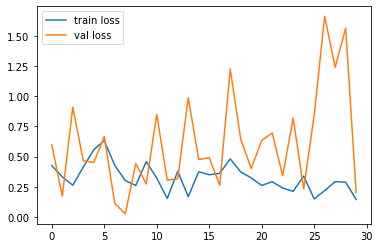

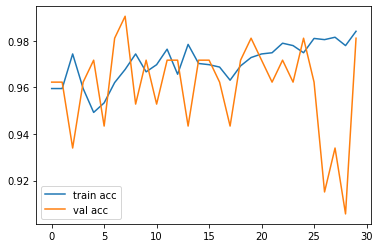

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/cotton_plant_disease/model_inception.h5')

In [23]:
y_pred = model.predict(test_set)

4/4 [==============================] - 5s 928ms/step


In [24]:
y_pred

array([[1.51201651e-01, 3.52976279e-28, 5.14071609e-27, 8.48798335e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.36700301e-25],
       [4.25706062e-28, 7.53522562e-22, 1.00000000e+00, 5.34972648e-27],
       [1.00000000e+00, 0.00000000e+00, 4.19165582e-34, 1.05617472e-29],
       [0.00000000e+00, 1.00000000e+00, 2.59841498e-32, 2.53934547e-25],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.30137541e-31, 1.00000000e+00, 0.00000000e+00, 1.74934868e-35],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.71864691e-36],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.74524804e-32],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.60803793e-38, 9.07842626e-25, 1.00000000e+00],
       [1.19969873e-05, 1.88125019e-11, 9.99987960e-01, 4.92615574e-36],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([3, 0, 2, 0, 1, 3, 1, 1, 1, 0, 3, 2, 0, 2, 3, 1, 3, 3, 2, 1, 0, 1,
       3, 0, 3, 2, 2, 0, 0, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 2, 0, 2, 3, 3, 2, 2, 3, 2, 2, 0,
       3, 0, 1, 0, 0, 2, 0, 3, 1, 3, 0, 1, 2, 1, 2, 3, 0, 0, 0, 3, 1, 1,
       3, 3, 0, 1, 1, 3, 1, 0, 3, 1, 3, 0, 1, 1, 1, 0, 1, 3])